In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [0]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

In [0]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("../data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

In [0]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

(2, 3)
-0.024817096524020674 -0.024817096523632728
0.02146482702264245 0.021464827022754648
-0.0065308606709167435 -0.006530860671011273
0.005307254416897368 0.005307254416497819
0.027927661255168063 0.027927661255811028
-0.00801671530008522 -0.008016715299929977
Gradient check passed!
(3, 4)
-1.503322498821751 -1.503322498819237
1.8302383552330634 1.8302383552382115
0.9357797158664962 0.9357797158715541
-0.3065670448789982 -0.30656704487208586
3.006644997643502 3.006644997638474
-3.660476710466127 -3.660476710465321
-1.8715594317329924 -1.871559431732006
0.6131340897579964 0.613134089755274
0.1503322498821751 0.15033224989302596
5.49071506569919 5.490715065714634
-0.09357797158664963 -0.09357797158271451
-0.9197011346369947 -0.9197011346384619
Gradient check passed!
(4,)
0.0 0.0
-1.8680222870794265 -1.8680222870826044
1.7534099466422033 1.753409946644857
-0.5310369506176832 -0.5310369506184021
Gradient check passed!


In [0]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-4)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 1e-2)

loss_history, train_history, val_history = trainer.fit()

Loss: 2.123609, Train accuracy: 0.345000, val accuracy: 0.344000
Loss: 2.150228, Train accuracy: 0.398222, val accuracy: 0.395000
Loss: 2.116302, Train accuracy: 0.393444, val accuracy: 0.365000
Loss: 2.469627, Train accuracy: 0.421889, val accuracy: 0.393000
Loss: 2.096470, Train accuracy: 0.441333, val accuracy: 0.403000
Loss: 1.861733, Train accuracy: 0.483778, val accuracy: 0.439000
Loss: 1.690390, Train accuracy: 0.472556, val accuracy: 0.428000
Loss: 1.687382, Train accuracy: 0.494778, val accuracy: 0.449000
Loss: 1.937019, Train accuracy: 0.480222, val accuracy: 0.437000
Loss: 1.742989, Train accuracy: 0.497333, val accuracy: 0.451000
Loss: 2.207980, Train accuracy: 0.504333, val accuracy: 0.456000
Loss: 1.722969, Train accuracy: 0.502000, val accuracy: 0.455000
Loss: 1.692127, Train accuracy: 0.501444, val accuracy: 0.453000
Loss: 1.907035, Train accuracy: 0.507889, val accuracy: 0.462000
Loss: 1.890662, Train accuracy: 0.505222, val accuracy: 0.464000
Loss: 1.658525, Train acc

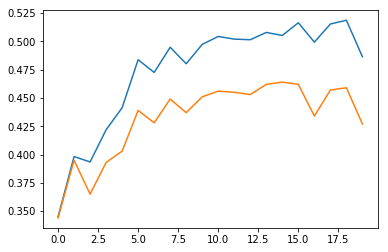

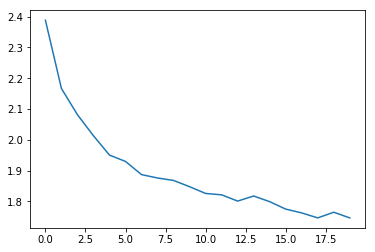

In [0]:
plt.plot(train_history)
plt.plot(val_history)
plt.figure()
plt.plot(loss_history)

Adding learning rate decay


In [0]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-4)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-2, learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()


Loss: 2.444528, Train accuracy: 0.334556, val accuracy: 0.337000
Loss: 2.468192, Train accuracy: 0.369889, val accuracy: 0.363000
Loss: 2.137044, Train accuracy: 0.397889, val accuracy: 0.386000
Loss: 1.948464, Train accuracy: 0.444000, val accuracy: 0.432000
Loss: 1.828270, Train accuracy: 0.470111, val accuracy: 0.449000
Loss: 2.321808, Train accuracy: 0.486889, val accuracy: 0.458000
Loss: 1.776132, Train accuracy: 0.493111, val accuracy: 0.472000
Loss: 2.104197, Train accuracy: 0.503556, val accuracy: 0.453000
Loss: 2.177151, Train accuracy: 0.505000, val accuracy: 0.463000
Loss: 1.574052, Train accuracy: 0.492556, val accuracy: 0.460000
Loss: 1.708395, Train accuracy: 0.511778, val accuracy: 0.464000
Loss: 1.545910, Train accuracy: 0.518778, val accuracy: 0.475000
Loss: 2.412511, Train accuracy: 0.522222, val accuracy: 0.473000
Loss: 1.695225, Train accuracy: 0.523778, val accuracy: 0.479000
Loss: 2.409101, Train accuracy: 0.527333, val accuracy: 0.478000
Loss: 1.940850, Train acc

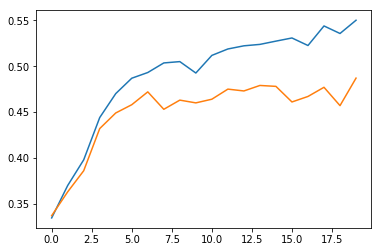

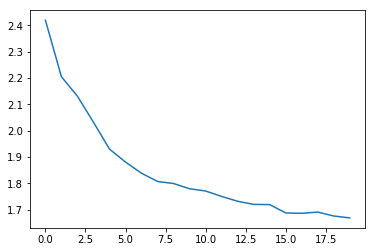

In [0]:
plt.plot(train_history)
plt.plot(val_history)
plt.figure()
plt.plot(loss_history)

# Накопление импульса (Momentum SGD)

```
velocity = momentum * velocity - learning_rate * gradient 
w = w + velocity
```

`momentum` здесь коэффициент затухания, который тоже является гиперпараметром (к счастью, для него часто есть хорошее значение по умолчанию, типичный диапазон -- 0.8-0.99).



In [0]:

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-4)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-3, learning_rate_decay=0.99)


loss_history, train_history, val_history = trainer.fit()

Loss: 2.150173, Train accuracy: 0.389667, val accuracy: 0.384000
Loss: 1.905407, Train accuracy: 0.398000, val accuracy: 0.381000
Loss: 1.753753, Train accuracy: 0.464111, val accuracy: 0.441000
Loss: 1.611024, Train accuracy: 0.467000, val accuracy: 0.438000
Loss: 1.993907, Train accuracy: 0.482667, val accuracy: 0.446000
Loss: 2.107510, Train accuracy: 0.493889, val accuracy: 0.448000
Loss: 1.484875, Train accuracy: 0.510778, val accuracy: 0.457000
Loss: 1.418529, Train accuracy: 0.520444, val accuracy: 0.470000
Loss: 1.744691, Train accuracy: 0.549000, val accuracy: 0.497000
Loss: 1.802017, Train accuracy: 0.543778, val accuracy: 0.473000
Loss: 1.731019, Train accuracy: 0.567000, val accuracy: 0.505000
Loss: 1.386718, Train accuracy: 0.557667, val accuracy: 0.490000
Loss: 1.228077, Train accuracy: 0.569556, val accuracy: 0.479000
Loss: 1.290066, Train accuracy: 0.589222, val accuracy: 0.508000
Loss: 2.070349, Train accuracy: 0.597333, val accuracy: 0.529000
Loss: 1.533368, Train acc

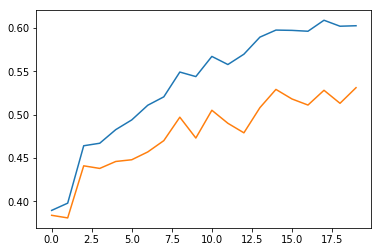

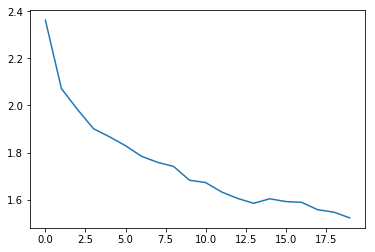

In [0]:
plt.plot(train_history)
plt.plot(val_history)
plt.figure()
plt.plot(loss_history)

In [0]:

learning_rate = 0.0001
reg_strength = 0.0001
learning_rate_decay = 0.999
hidden_layer_size = 80
num_epochs = 200
batch_size = 128

best_classifier = None
best_val_accuracy = None

loss_history = []
train_history = []
val_history = []

model = TwoLayerNet(n_input = train_X.shape[1],
                    n_output = 10, 
                    hidden_layer_size = hidden_layer_size,
                    reg = reg_strength)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model,
                  dataset,
                  MomentumSGD(), 
                  learning_rate=learning_rate,
                  num_epochs=num_epochs,
                  learning_rate_decay=learning_rate_decay,
                  batch_size=batch_size)

loss_history, train_history, val_history = trainer.fit()


print('best validation accuracy achieved: %f' % multiclass_accuracy(model.predict(val_X), val_y))

best validation accuracy achieved: 0.645000


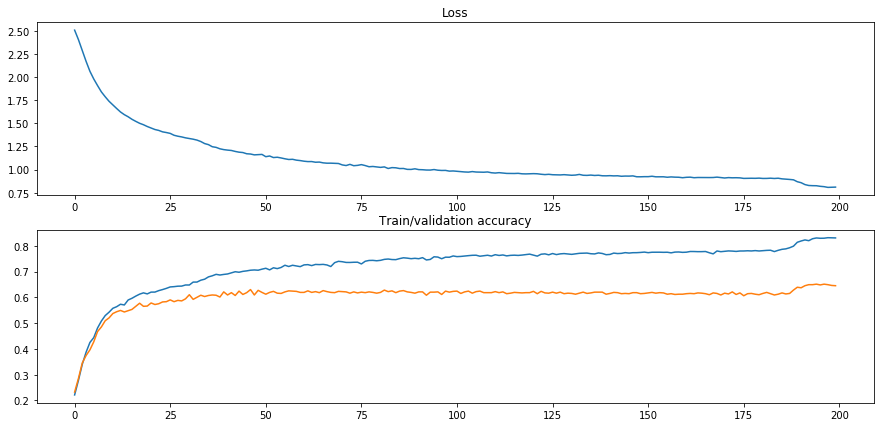

In [0]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

# Как обычно, посмотрим, как наша лучшая модель работает на тестовых данных

In [0]:
test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.661000
